# Lösung zu Aufgabe 1, Perzeptron

### eine mögliche Lösung von Jan Salmen

### Aufgabe und Hintergrund -> siehe Folie 45 (Vorlesung01)

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


# Diese Funktion zeichnet in ein neues Koordinatensystem den aktuellen Stand unseres Trainings
def plotPerceptron(points1, points2, vecW):
    newFig = plt.figure()
    axs = newFig.add_subplot(1, 1, 1)
    
    axs.scatter( points1[:,0], points1[:,1] )  # Punkte Klasse "+1" einzeichnen
    axs.scatter( points2[:,0], points2[:,1] )  # Punkte Klasse "-1" einzeichnen

    wNorm = vecW / norm(w, 2)
    axs.arrow( 0, 0, wNorm[0], wNorm[1], head_width=0.05, head_length=0.1, color='blue' )  # Gewichtsvektor w, normiert
    axs.arrow( -wNorm[1], wNorm[0], 2*wNorm[1], -2*wNorm[0], color='red' )  # Trennebene
    
    axs.axis('scaled')

In [2]:
# Hier werden Trainingsdaten zufällig erzeugt
nDim = 2  # Anzahl Dimensionen für unser XOR-Problem. Dargestellt werden immer 2 ;)
nPointPerQuadrant = 20  # Anzahl Punkte pro Klasse (Quadrant I oder III)

pts1 = np.random.uniform( low=0, high=1, size=(nPointPerQuadrant, nDim) )  # Punkte Klasse "+1" zufällig erzeugen
pts2 = np.random.uniform( low=-1, high=0, size=(nPointPerQuadrant, nDim) )  # Punkte Klasse "-1" zufällig erzeugen
pts = np.concatenate( (pts1, pts2) )  # alle Punkte
#print (pts)

In [3]:
# Zu den Trainingsdaten gehören jeweils auch Zielwerte (Label)
y1 = nPointPerQuadrant*[1]
y2 = nPointPerQuadrant*[-1]
y = y1 + y2
#print (y)

epoche 1, w: [ 1.25765824 -0.20979095], wrong: 7
epoche 2, w: [ 1.27532847 -0.02188912], wrong: 2
epoche 3, w: [ 1.27532847 -0.02188912], wrong: 0


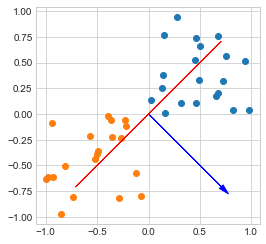

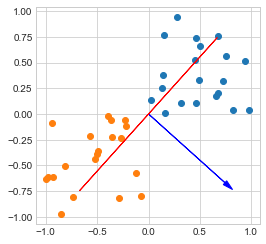

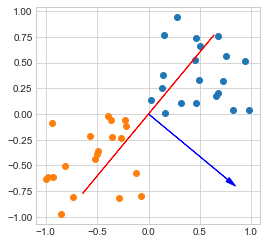

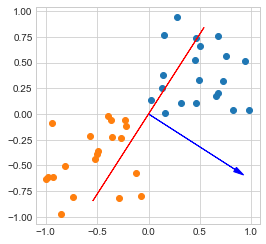

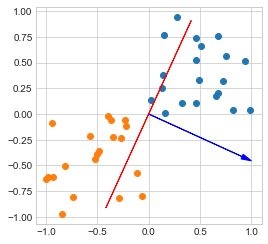

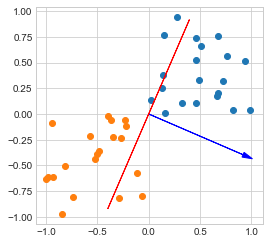

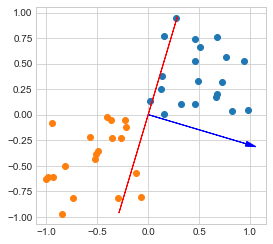

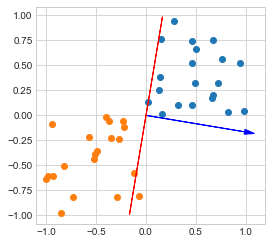

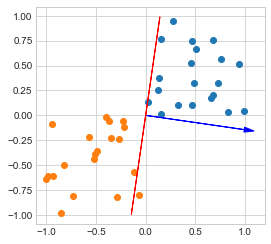

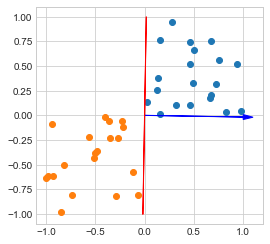

In [4]:
if 2 == nDim:
    w = [1, -1]  # 2-dimensionaler Fall
else:
    w = np.random.uniform( low=-1, high=1, size=nDim )  # Gewichtsvektor w zufällig initialisieren

plotPerceptron(pts1, pts2, w)

learnRate = 0.1  # Lernrate
nEpoches = 10  # Wie oft gehen wir unsere Trainingsdaten durch?

for epoche in range(1, nEpoches):
    wrong = 0
    for i, x in enumerate(pts):  
        u = np.inner(w, x)
        if u <= 0:
            yHat = -1  # Ergebnis kleiner/gleich Schwellwert (hier Theta = 0 / kein Bias) -> Ausgabe -1
        else:
            yHat = 1  # Ergebnis größer Schwellwert (hier Theta = 0 / kein Bias) -> Ausgabe +1

        d = y[i] - yHat
        if ( 0 != d ):
            # falsch klassifiziert! Gewichte anpassen
            wrong += 1
            w = w + learnRate * d * x
            plotPerceptron(pts1, pts2, w)
        
    print( f"epoche {epoche}, w: {w}, wrong: {wrong}" )
    if 0 == wrong:
        # Wenn in einer Epoche alle Punkte richtig klassifiziert wurden, können wir das Training abbrechen!
        break